In [1]:
import data_loader
import data_analyze
import data_visual
import log
import warnings
import pandas as pd

In [3]:
# Игнорирование предупреждений (опционально)
warnings.filterwarnings('ignore')

In [5]:
'''
dataset from https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction?resource=download
'''
file_path = "Obesity prediction.csv"

In [7]:
try:
    data = data_loader.load_data_csv(file_path) 
    log.add_log_info('Чтение файла прошло успешно')
except FileNotFoundError:
    log.add_log_error('Файл не найден')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_load_data_csv')

In [9]:
data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data.info() # информация о типе данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [15]:
# Анализ данных
log.add_log_info('Анализ данных')

In [17]:
# Проверяем на пропуски
is_null = data_analyze.check_data(data)
is_null.sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [19]:
# Проверяем на дубли
is_duplicated = data_analyze.duplicated_data(data)
is_duplicated.sum()

24

In [21]:
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [23]:
# Визуализация данных
log.add_log_info('Визуализация данных')

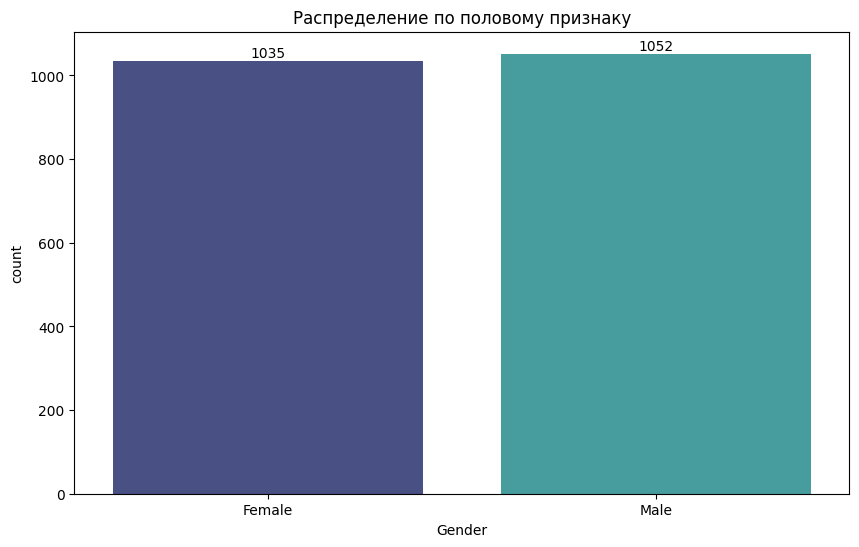

In [25]:
# Распределение по половому признаку
try:
    data_visual.add_countplot(data, 'Gender', 'Gender_info', 'Распределение по половому признаку')
    log.add_log_info('Распределение по половому признаку')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

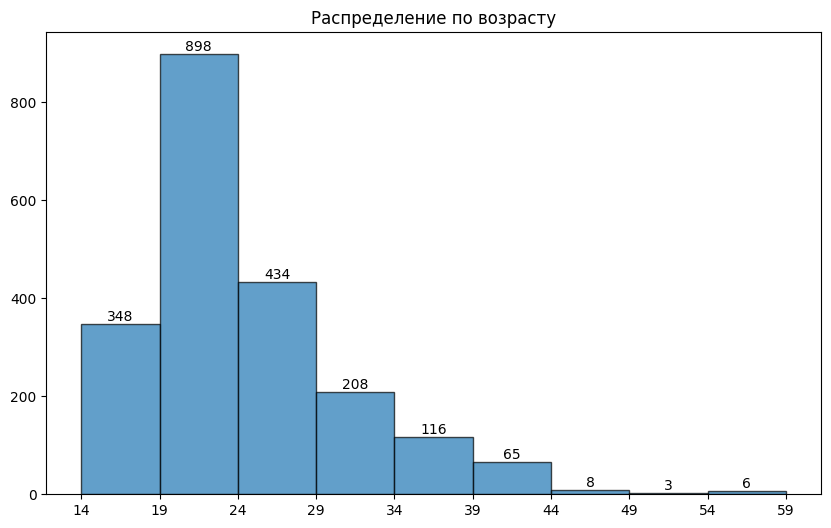

In [26]:
# Распределение по возрасту
try:
    data_visual.add_hist(data.Age, 'Age_info', 'Распределение по возрасту', 5, 1)
    log.add_log_info('Распределение по возрасту')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

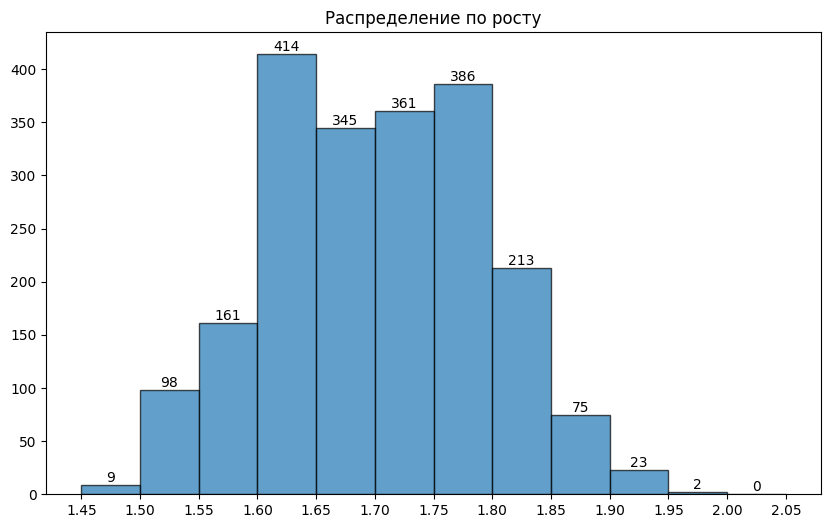

In [28]:
# Распределение по росту
try:
    data_visual.add_hist(data.Height, 'Height_info', 'Распределение по росту', 0.05, 0.1)
    log.add_log_info('Распределение по росту')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

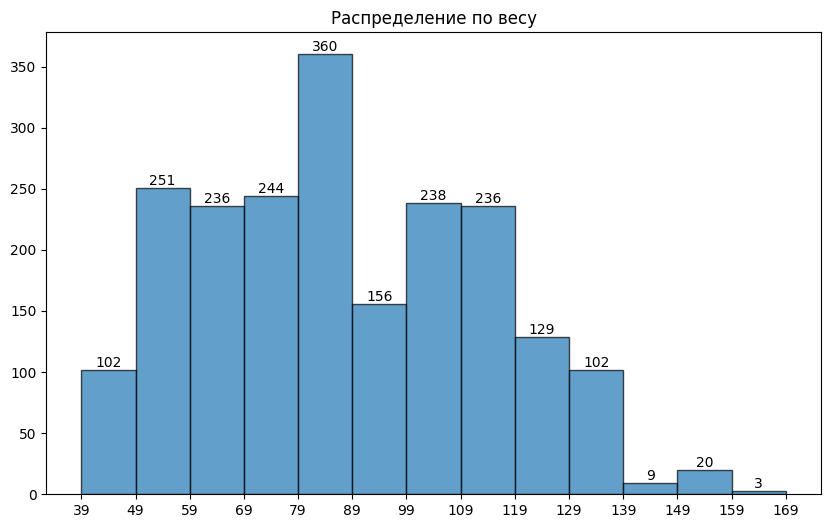

In [30]:
# Распределение по весу
try:
    data_visual.add_hist(data.Weight, 'Weight_info', 'Распределение по весу', 10, 5)
    log.add_log_info('Распределение по весу')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

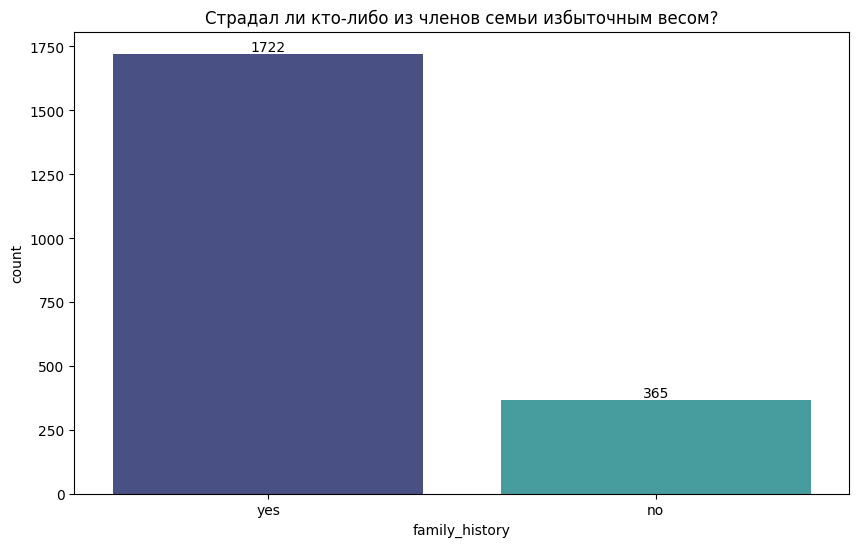

In [32]:
# Распределение по семейному анамнезу
try:
    data_visual.add_countplot(data, 'family_history', 'family_history_info', 'Страдал ли кто-либо из членов семьи избыточным весом?')
    log.add_log_info('Распределение по семейному анамнезу')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

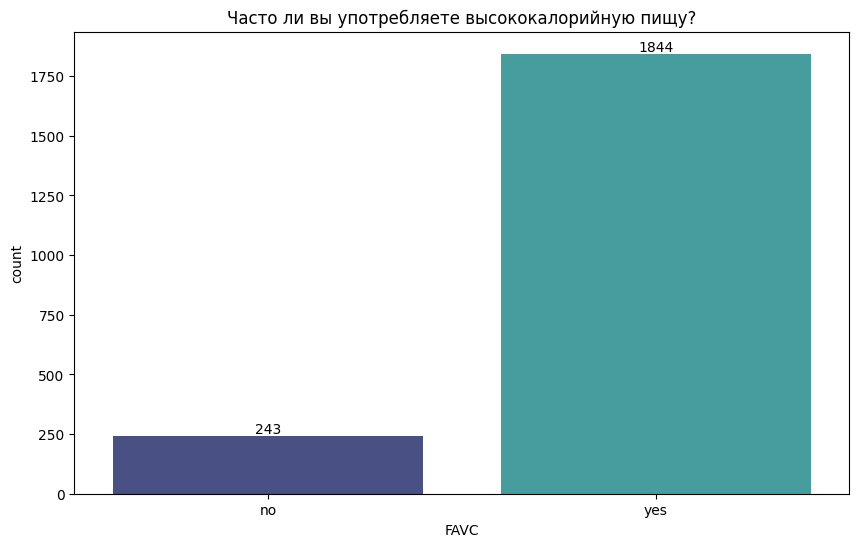

In [35]:
# Распределение по колоражу
try:
    data_visual.add_countplot(data, 'FAVC', 'FAVC_info', 'Часто ли вы употребляете высококалорийную пищу?')
    log.add_log_info('Распределение по колоражу')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

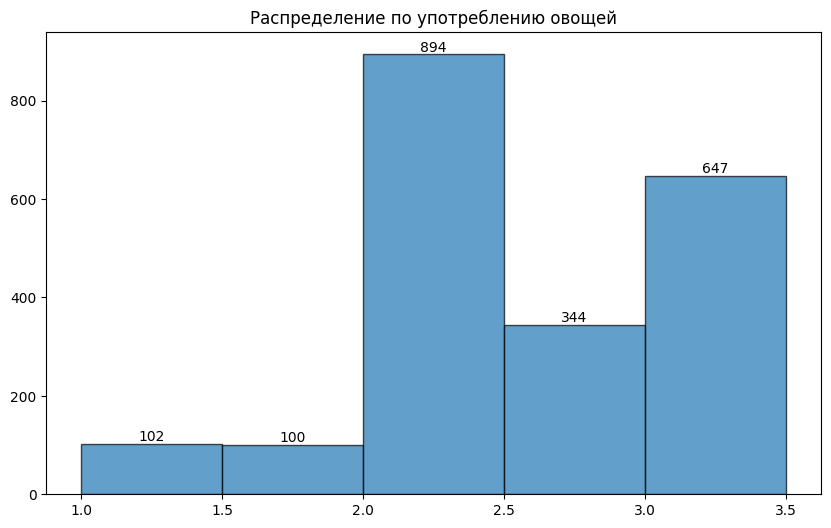

In [37]:
# Распределение по употреблению овощей
try:
    data_visual.add_hist(data.FCVC, 'FCVC_info', 'Распределение по употреблению овощей', 0.5, 1)
    log.add_log_info('Распределение по употреблению овощей')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

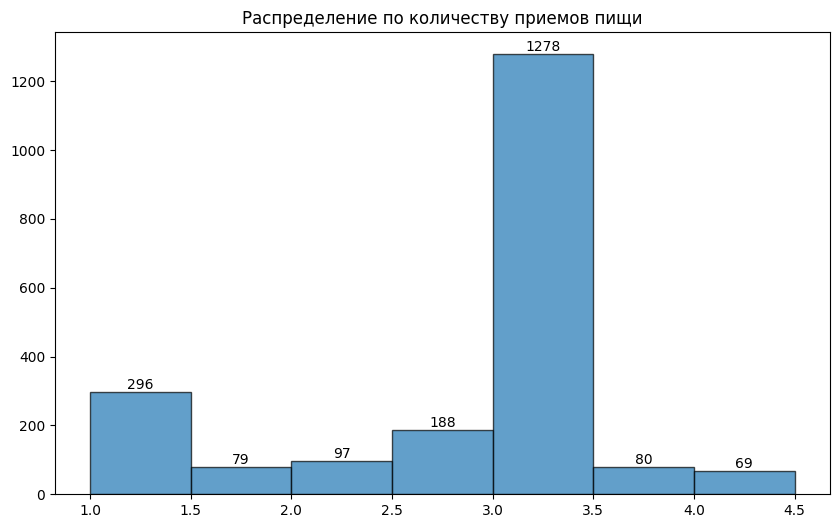

In [39]:
# Распределение по количеству приемов пищи
try:
    data_visual.add_hist(data.NCP, 'NCP_info', 'Распределение по количеству приемов пищи', 0.5, 1)
    log.add_log_info('Распределение по количеству приемов пищи')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

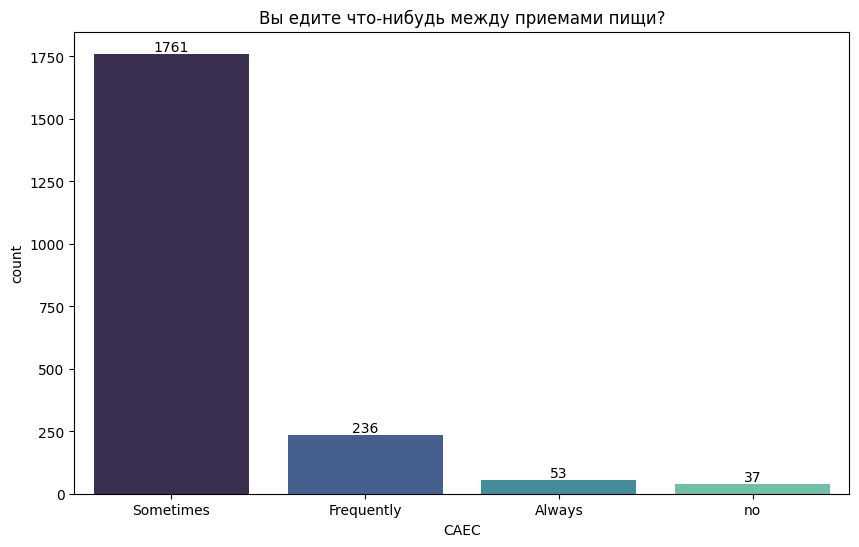

In [41]:
# Распределение по количеству перекусов
try:
    data_visual.add_countplot(data, 'CAEC', 'CAEC_info', 'Вы едите что-нибудь между приемами пищи?')
    log.add_log_info('Распределение по количеству перекусов')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

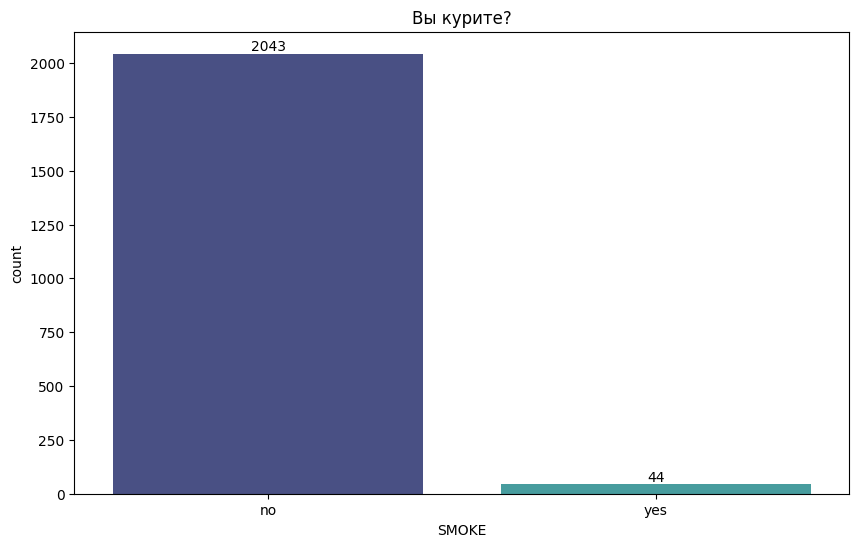

In [43]:
# Распределение по курящим и не курящим
try:
    data_visual.add_countplot(data, 'SMOKE', 'SMOKE_info', 'Вы курите?')
    log.add_log_info('Распределение по курящим и не курящим')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

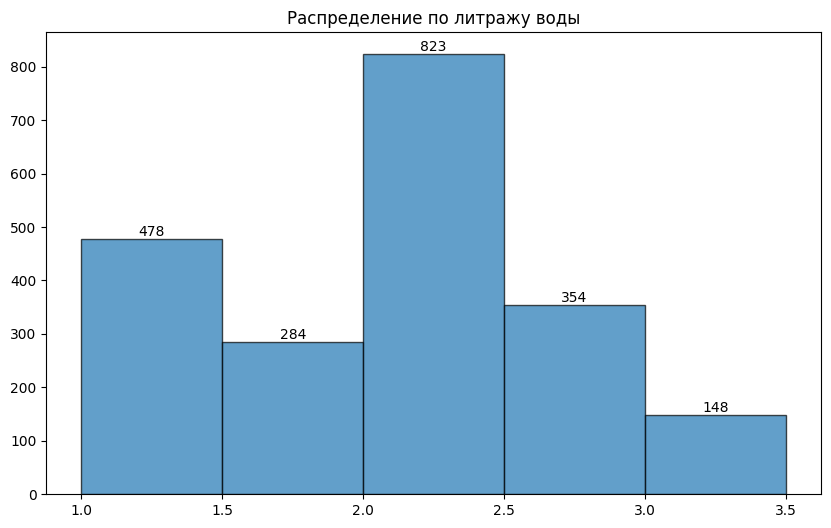

In [45]:
# Распределение по литражу воды
try:
    data_visual.add_hist(data.CH2O, 'CH2O_info', 'Распределение по литражу воды', 0.5, 1)
    log.add_log_info('Распределение по литражу воды')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

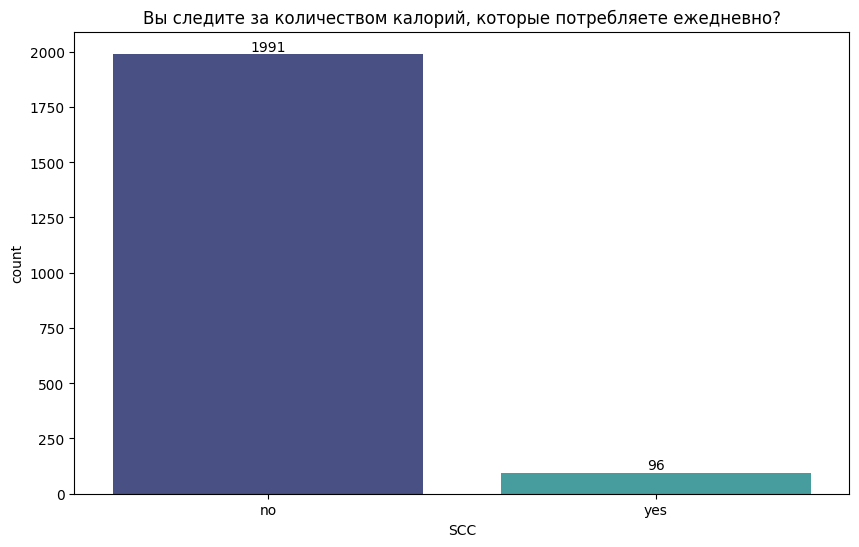

In [47]:
# Распределение по следящим за калоражем
try:
    data_visual.add_countplot(data, 'SCC', 'SCC_info', 'Вы следите за количеством калорий, которые потребляете ежедневно?')
    log.add_log_info('Распределение по следящим за калоражем')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

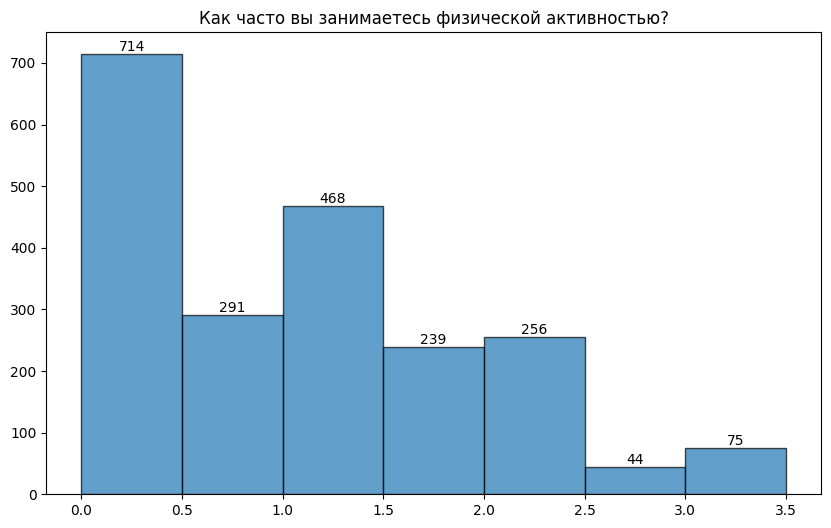

In [49]:
# Распределение по физической нагрузке в разах в неделю
try:
    data_visual.add_hist(data.FAF, 'FAF_info', 'Как часто вы занимаетесь физической активностью?', 0.5, 1)
    log.add_log_info('Распределение по физической нагрузке в разах в неделю')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

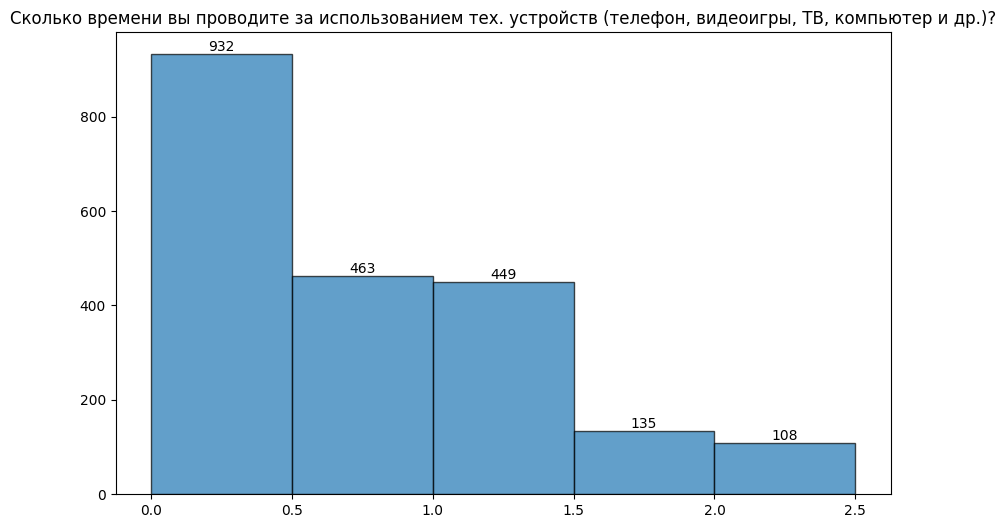

In [51]:
# Распределение по использованию гаджетов в часах в день
try:
    data_visual.add_hist(data.TUE, 'TUE_info', 'Сколько времени вы проводите за использованием тех. устройств (телефон, видеоигры, ТВ, компьютер и др.)?', 0.5, 1)
    log.add_log_info('Распределение по использованию гаджетов в часах в день')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

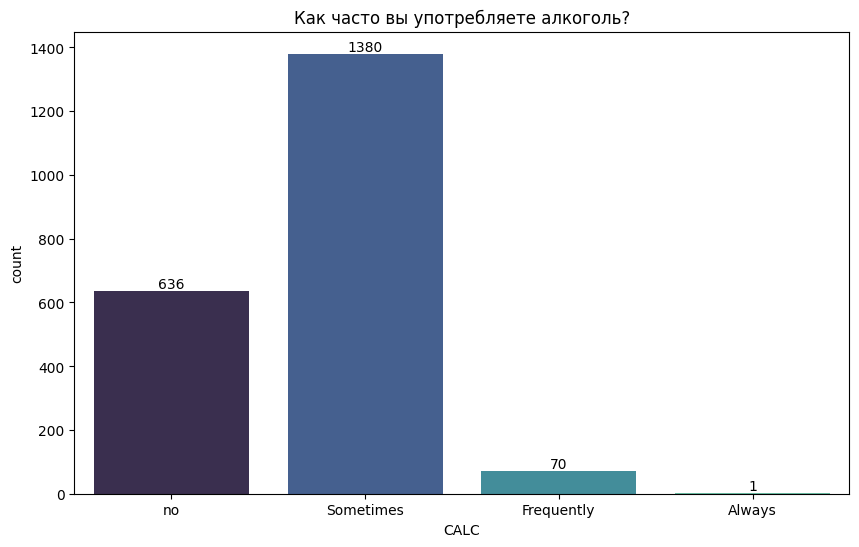

In [52]:
# Распределение по употреблению алкоголя
try:
    data_visual.add_countplot(data, 'CALC', 'CALC_info', 'Как часто вы употребляете алкоголь?')
    log.add_log_info('Распределение по употреблению алкоголя')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

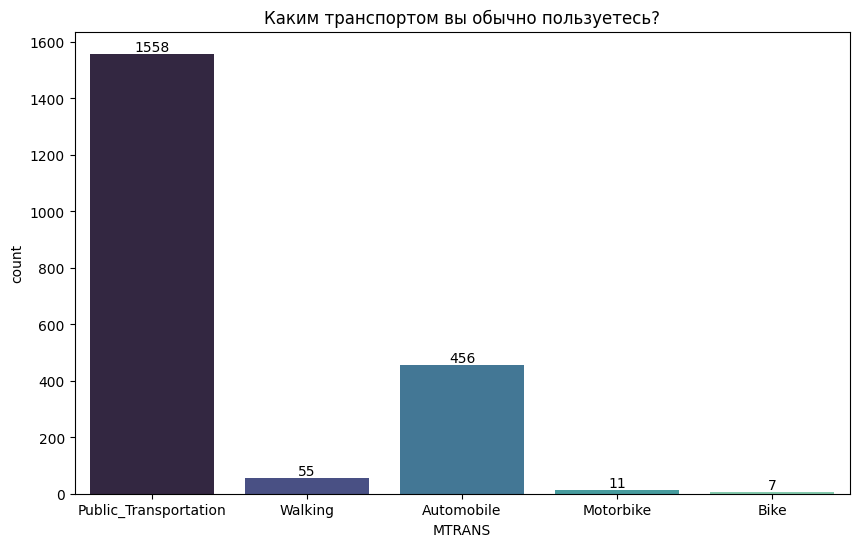

In [55]:
# Распределение по типу передвижения
try:
    data_visual.add_countplot(data, 'MTRANS', 'MTRANS_info', 'Каким транспортом вы обычно пользуетесь?')
    log.add_log_info('Распределение по типу передвижения')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

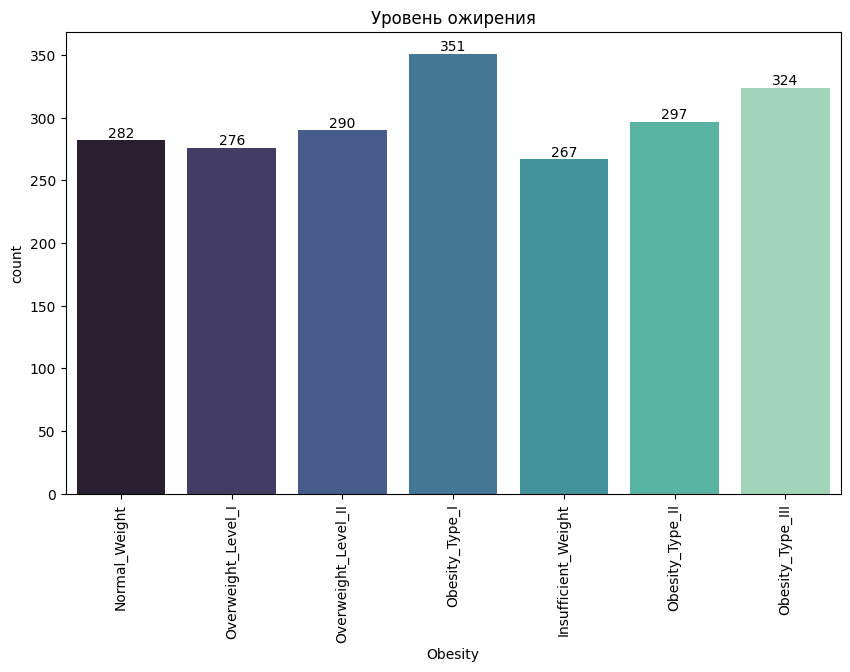

In [56]:
# Распределение по уровню ожирения (целевой столбец)
try:
    data_visual.add_countplot(data, 'Obesity', 'Obesity_info', 'Уровень ожирения')
    log.add_log_info('Распределение по уровню ожирения (целевой столбец)')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_countplot')

In [58]:
# Предобработка
log.add_log_info('Предобработка')

In [61]:
# Разделение столбцов на числовые и категориальные
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Обработка пропущенных значений для числовых столбцов
if data[numeric_columns].isnull().sum().any():
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Обработка пропущенных значений для категориальных столбцов
if data[categorical_columns].isnull().sum().any():
    data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [65]:
# Кодирование категориальных признаков с использованием LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
log.add_log_info("Кодирование категориальных признаков с использованием LabelEncoder")

In [67]:
# Поиск аномалий
log.add_log_info('Поиск аномалий')

In [69]:
from sklearn.ensemble import IsolationForest

# Извлечение необходимых атрибутов для анализа
features = data[['Age', 'Height', 'Weight', 'Gender', 'family_history', 
                 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 
                 'SCC', 'FAF', 'TUE', 'CALC']]

# Стандартизация данных
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Используем Isolation Forest для поиска аномалий
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(features_scaled)

# Определяем аномалии
data['anomaly'] = model.predict(features_scaled)
data['anomaly'] = data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Просмотр результатов
anomalies = data[data['anomaly'] == 'Anomaly']
print("Количество аномалий:", anomalies.shape[0])

Количество аномалий: 105


In [70]:
data = data[data['anomaly'] != 'Anomaly']
data = data.drop(columns=['anomaly'], axis=1)

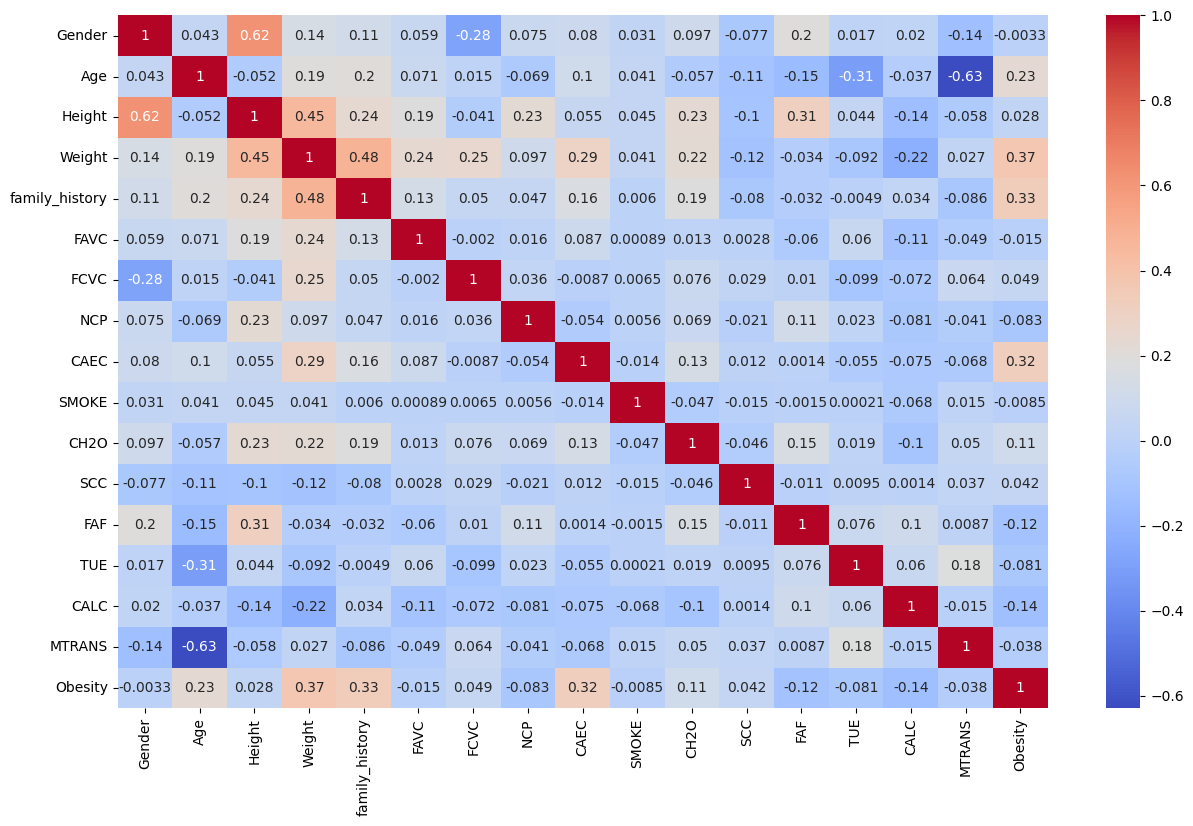

In [73]:
# Матрица корреляции
try:
    data_visual.add_heatmap(data, 'Corr_origin_info')
    log.add_log_info('Матрица корреляции')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_distplot')

In [74]:
# Обучение моделей
log.add_log_info('Обучение моделей')

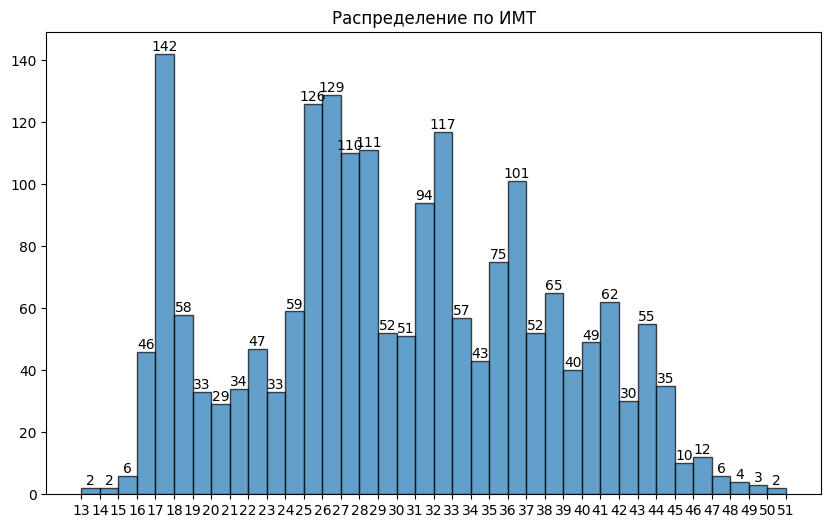

In [75]:
data['IMT'] = data['Weight']/(data['Height']*data['Height'])

# Распределение по ИМТ
try:
    data_visual.add_hist(data.IMT, 'IMT_info', 'Распределение по ИМТ', 1, 1)
    log.add_log_info('Распределение по ИМТ')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_hist')

In [76]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['Obesity'], axis=1)
y = data['Obesity']
log.add_log_info('Разделение на признаки и целевую переменную')

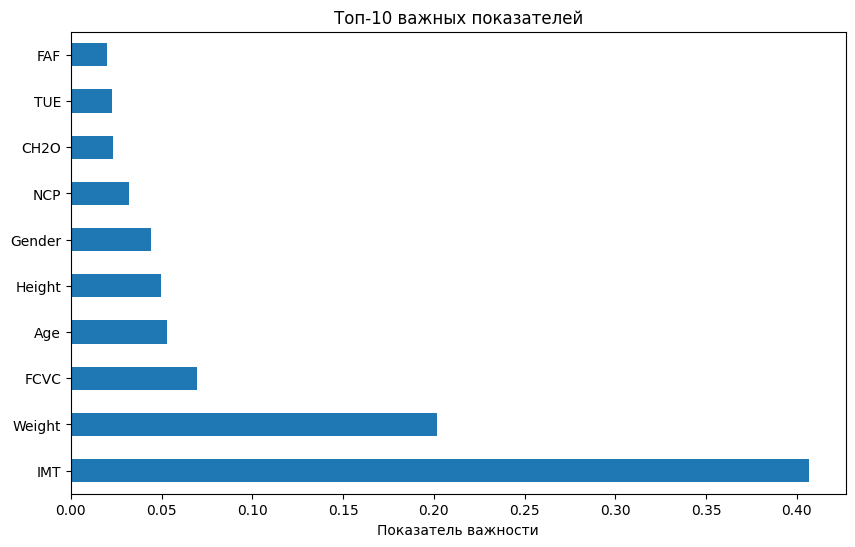

In [77]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Обучение случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Важность признаков
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Топ-10 важных показателей')
plt.xlabel('Показатель важности')
plt.savefig('out_jpg/Feature_importance.png')
plt.show()

In [80]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [83]:
''' 
1) silhouette_scores - Средний коэффициент силуэта для всех выборок
+1 : Точки данных в значительной степени связаны внутри кластеров и хорошо отделены от других кластеров.
0 : Точки данных находятся на границе между двумя кластерами или очень близко к ней.
-1 : Точки данных могут быть неправильно классифицированы и отнесены к неправильным кластерам.

2) davies_bouldin_scores - Оценка Дэвиса-Боулдина
Более низкие значения соответствуют более эффективной кластеризации

3) inertia_scores - Сумма квадратов расстояний между каждой точкой данных и ближайшим центром кластера
Меньшее значение инерции указывает на то, что точки данных находятся ближе к назначенному им центру кластера, 
что обычно означает более чёткое разделение на кластеры

4) calinski_harabasz_scores - Критерий соотношения дисперсий
Более высокое значение указывает на лучшую кластеризацию, поскольку это означает, что точки данных более разбросаны между 
кластерами, чем внутри кластеров
'''

' \n1) silhouette_scores - Средний коэффициент силуэта для всех выборок\n+1 : Точки данных в значительной степени связаны внутри кластеров и хорошо отделены от других кластеров.\n0 : Точки данных находятся на границе между двумя кластерами или очень близко к ней.\n-1 : Точки данных могут быть неправильно классифицированы и отнесены к неправильным кластерам.\n\n2) davies_bouldin_scores - Оценка Дэвиса-Боулдина\nБолее низкие значения соответствуют более эффективной кластеризации\n\n3) inertia_scores - Сумма квадратов расстояний между каждой точкой данных и ближайшим центром кластера\nМеньшее значение инерции указывает на то, что точки данных находятся ближе к назначенному им центру кластера, \nчто обычно означает более чёткое разделение на кластеры\n\n4) calinski_harabasz_scores - Критерий соотношения дисперсий\nБолее высокое значение указывает на лучшую кластеризацию, поскольку это означает, что точки данных более разбросаны между \nкластерами, чем внутри кластеров\n'

K-Means Количество кластеров: 2
K-Means Silhouette Score: 0.56
K-Means Davies-Bouldin Score: 0.61
K-Means Inertia: 518715.43
K-Means Calinski-Harabasz Score: 3994.05


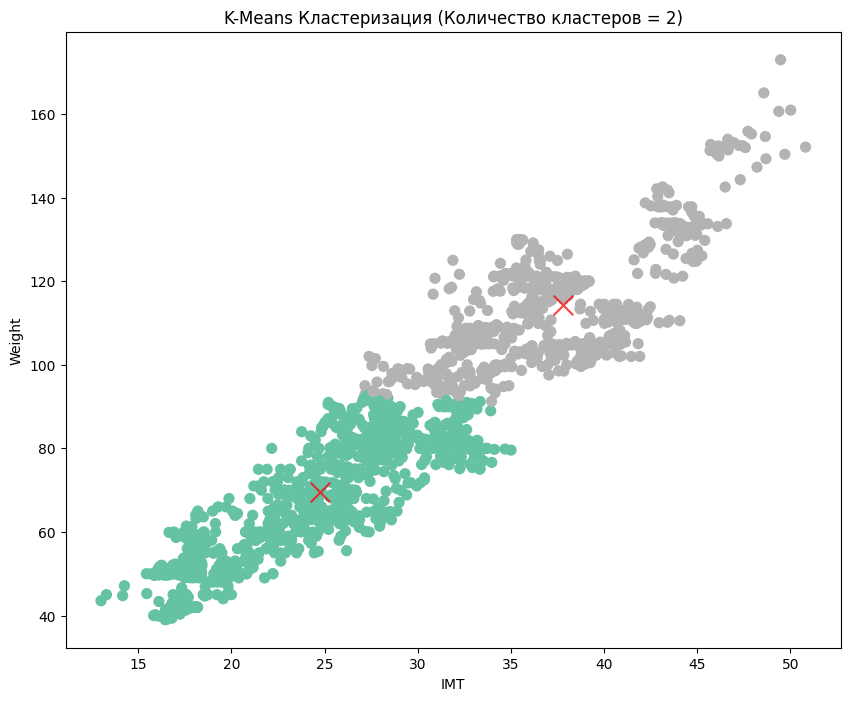

K-Means Количество кластеров: 3
K-Means Silhouette Score: 0.50
K-Means Davies-Bouldin Score: 0.68
K-Means Inertia: 294857.28
K-Means Calinski-Harabasz Score: 4262.64


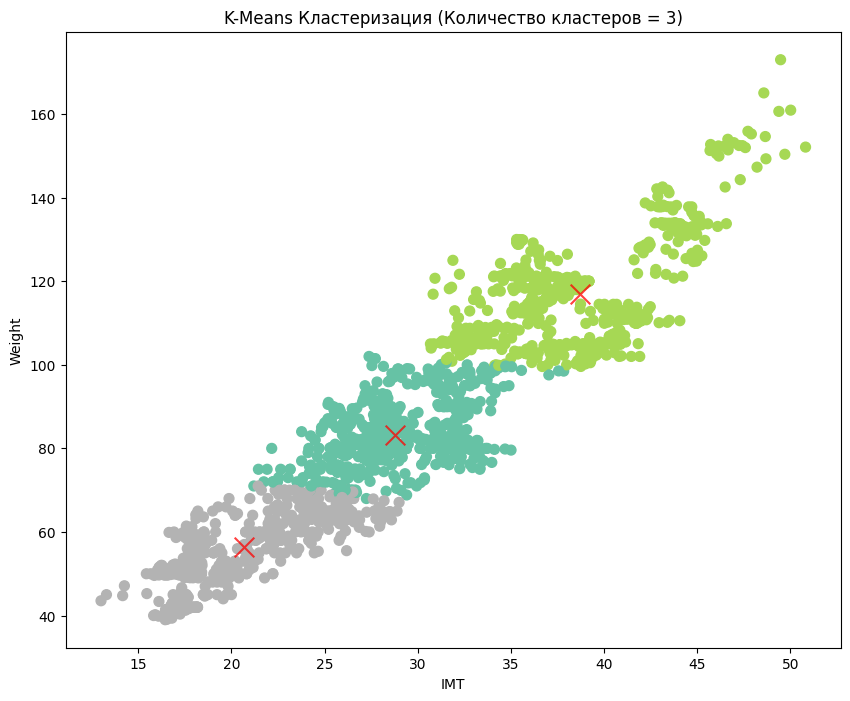

K-Means Количество кластеров: 4
K-Means Silhouette Score: 0.48
K-Means Davies-Bouldin Score: 0.66
K-Means Inertia: 207172.58
K-Means Calinski-Harabasz Score: 4321.57


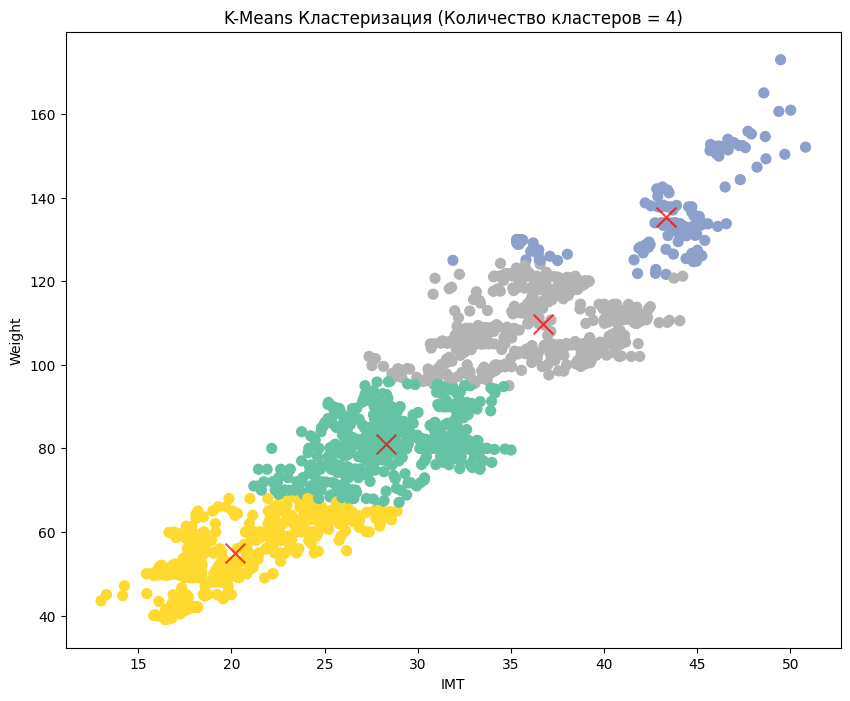

K-Means Количество кластеров: 5
K-Means Silhouette Score: 0.42
K-Means Davies-Bouldin Score: 0.79
K-Means Inertia: 175641.06
K-Means Calinski-Harabasz Score: 3909.83


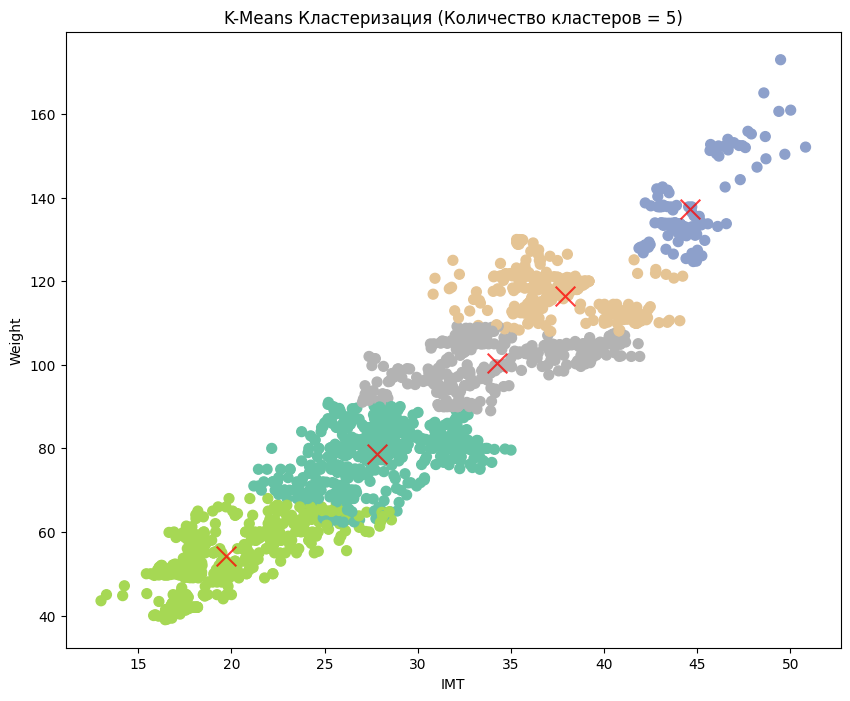

K-Means Количество кластеров: 6
K-Means Silhouette Score: 0.39
K-Means Davies-Bouldin Score: 1.00
K-Means Inertia: 147124.40
K-Means Calinski-Harabasz Score: 3808.82


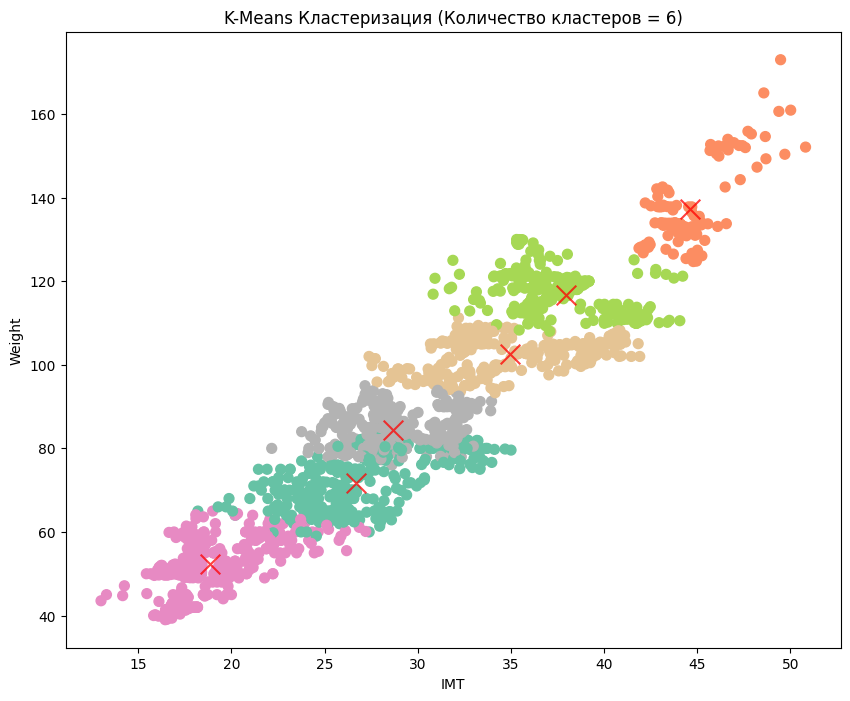

K-Means Количество кластеров: 7
K-Means Silhouette Score: 0.42
K-Means Davies-Bouldin Score: 0.83
K-Means Inertia: 111911.66
K-Means Calinski-Harabasz Score: 4274.17


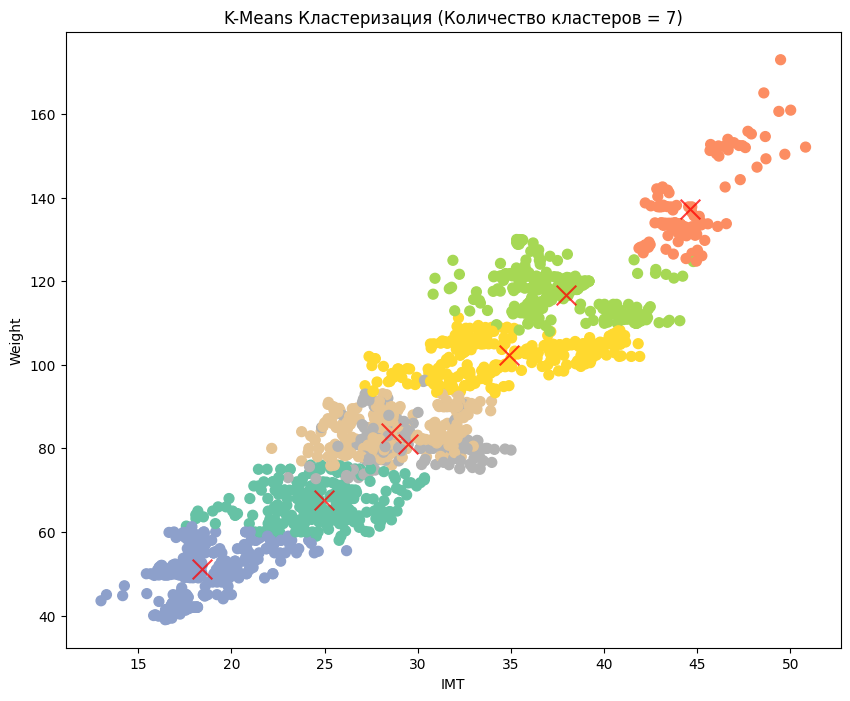

K-Means Количество кластеров: 8
K-Means Silhouette Score: 0.41
K-Means Davies-Bouldin Score: 0.89
K-Means Inertia: 105660.12
K-Means Calinski-Harabasz Score: 3895.06


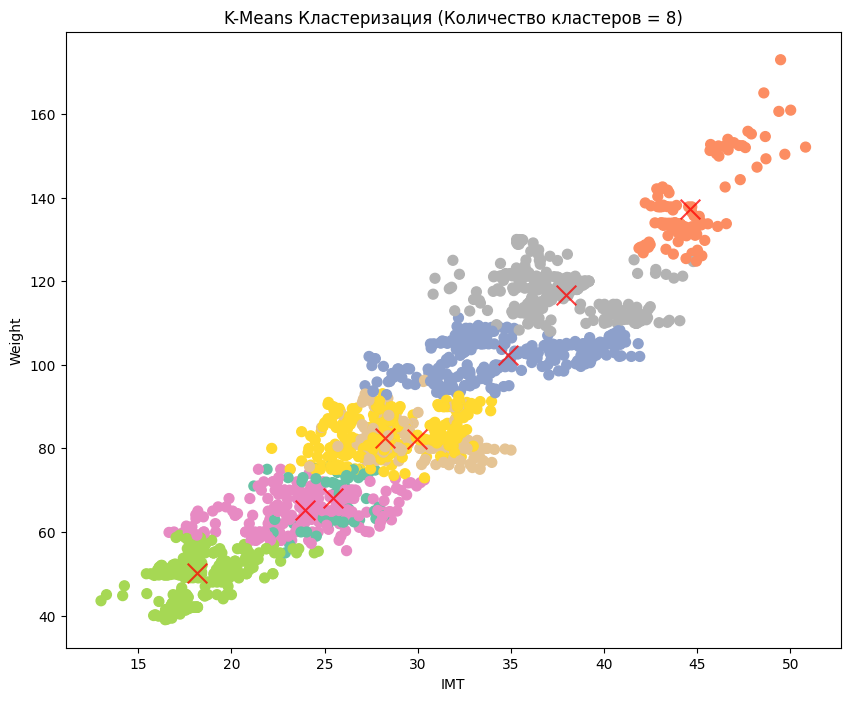

K-Means Количество кластеров: 9
K-Means Silhouette Score: 0.38
K-Means Davies-Bouldin Score: 0.92
K-Means Inertia: 95727.22
K-Means Calinski-Harabasz Score: 3785.50


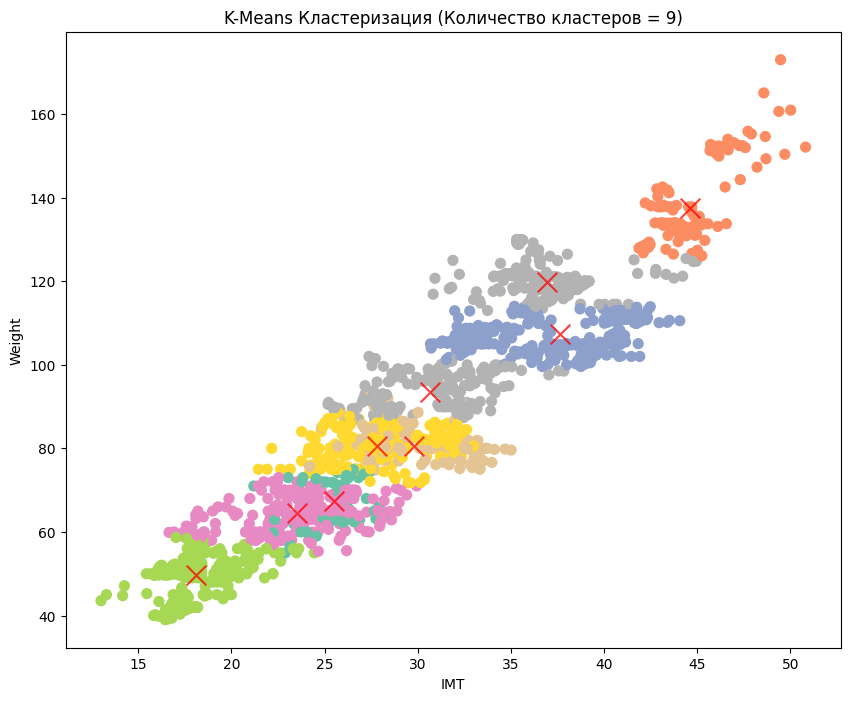

K-Means Количество кластеров: 10
K-Means Silhouette Score: 0.39
K-Means Davies-Bouldin Score: 0.86
K-Means Inertia: 86660.14
K-Means Calinski-Harabasz Score: 3737.99


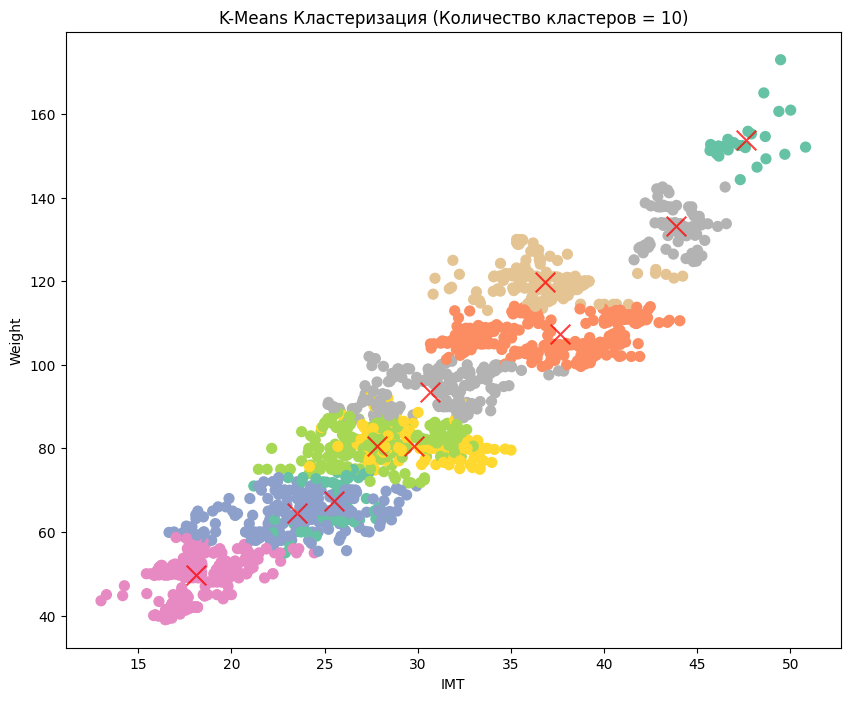

K-Means Количество кластеров: 11
K-Means Silhouette Score: 0.39
K-Means Davies-Bouldin Score: 0.87
K-Means Inertia: 79624.26
K-Means Calinski-Harabasz Score: 3677.03


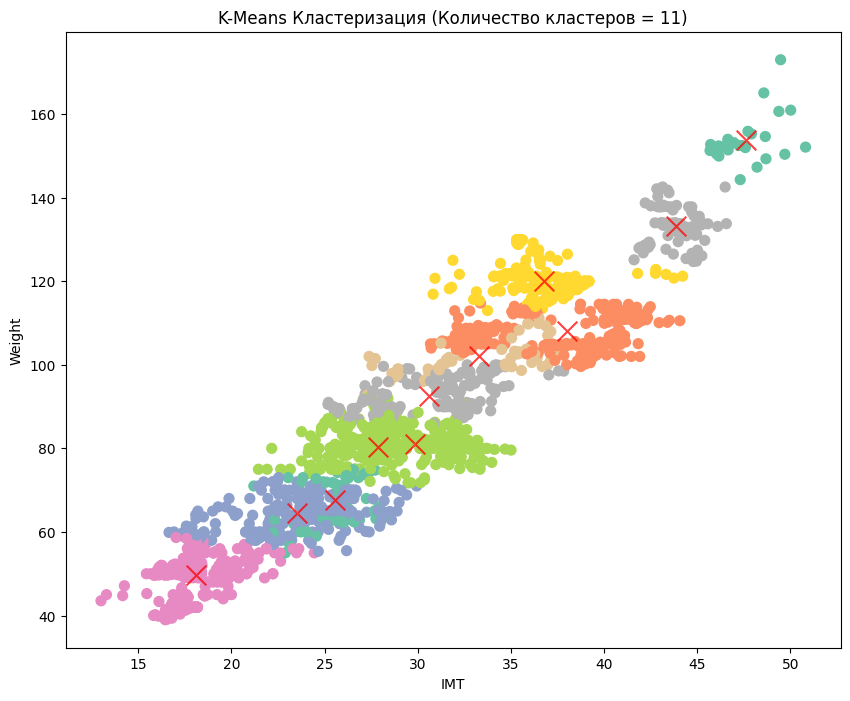

K-Means Количество кластеров: 12
K-Means Silhouette Score: 0.37
K-Means Davies-Bouldin Score: 0.89
K-Means Inertia: 72219.10
K-Means Calinski-Harabasz Score: 3702.00


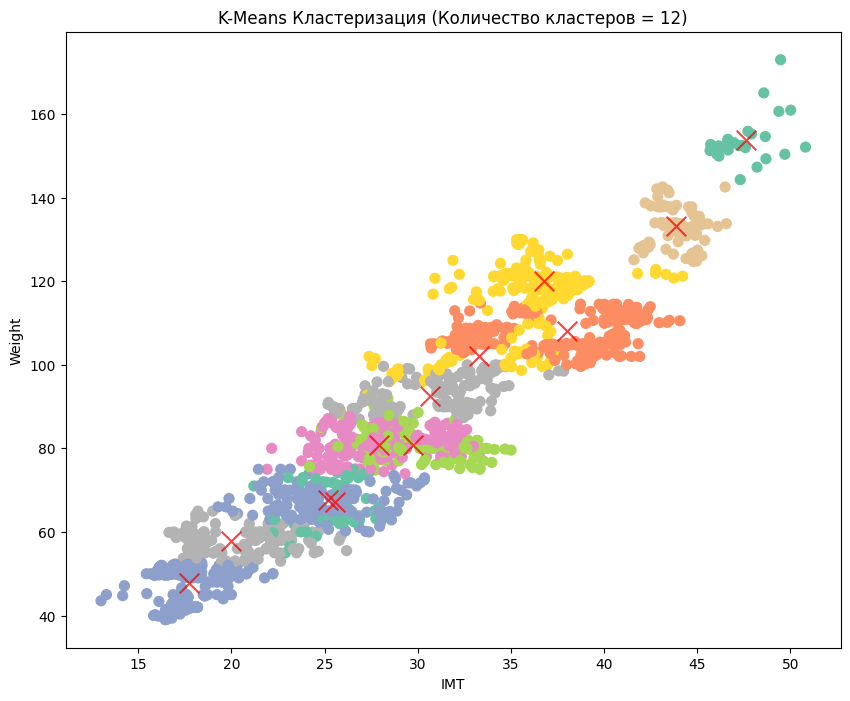

K-Means Количество кластеров: 13
K-Means Silhouette Score: 0.35
K-Means Davies-Bouldin Score: 0.94
K-Means Inertia: 68147.05
K-Means Calinski-Harabasz Score: 3604.26


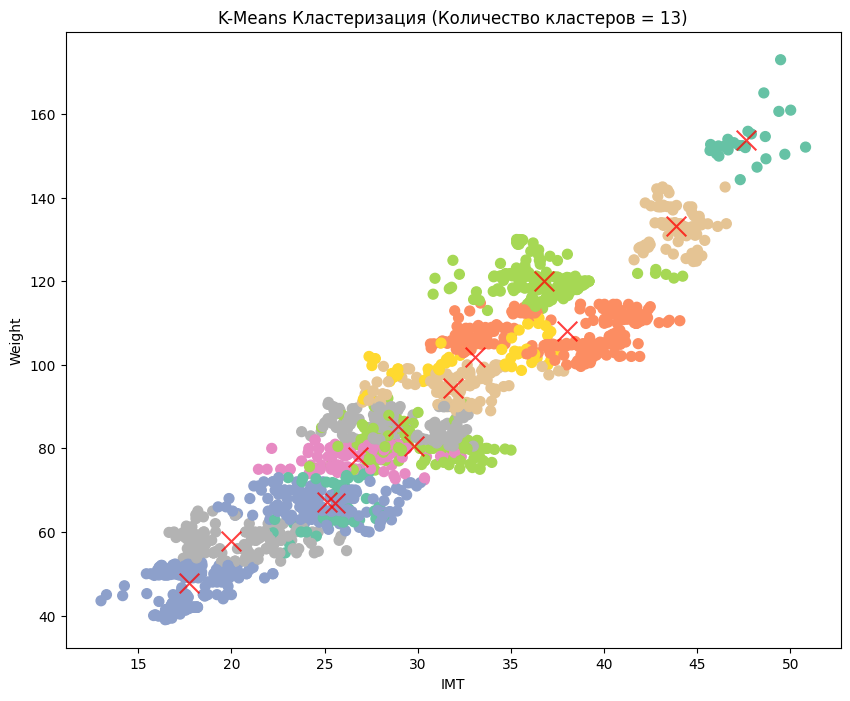

K-Means Количество кластеров: 14
K-Means Silhouette Score: 0.35
K-Means Davies-Bouldin Score: 0.95
K-Means Inertia: 63149.50
K-Means Calinski-Harabasz Score: 3600.46


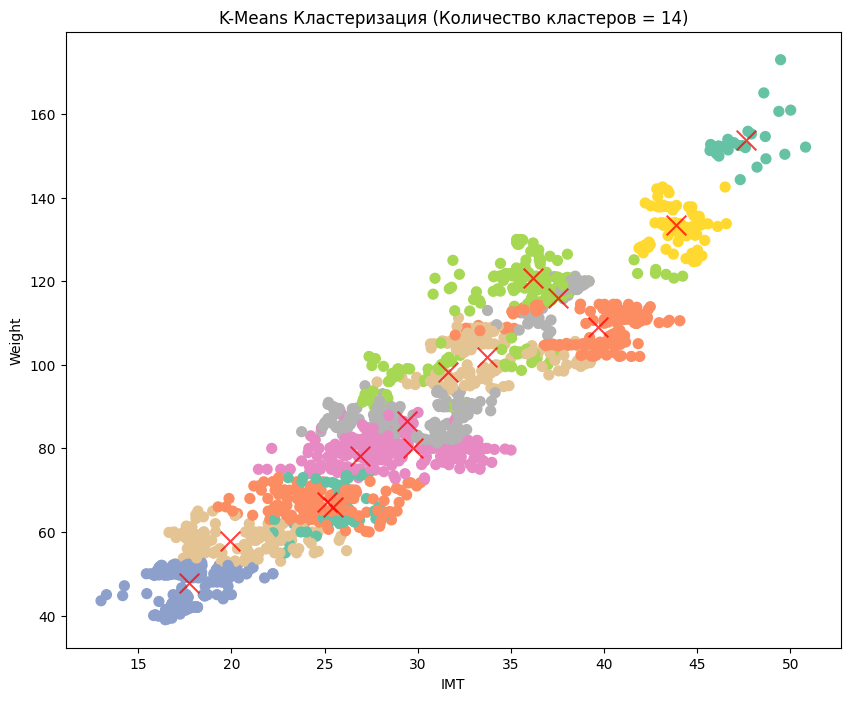

K-Means Количество кластеров: 15
K-Means Silhouette Score: 0.35
K-Means Davies-Bouldin Score: 0.97
K-Means Inertia: 59139.25
K-Means Calinski-Harabasz Score: 3577.70


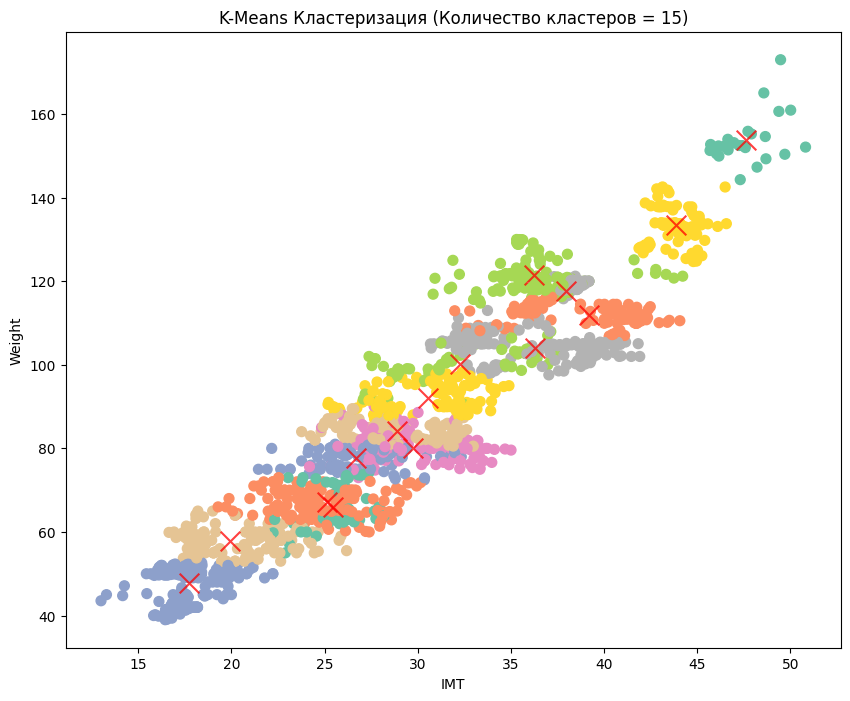

K-Means Количество кластеров: 16
K-Means Silhouette Score: 0.33
K-Means Davies-Bouldin Score: 1.00
K-Means Inertia: 57970.25
K-Means Calinski-Harabasz Score: 3407.44


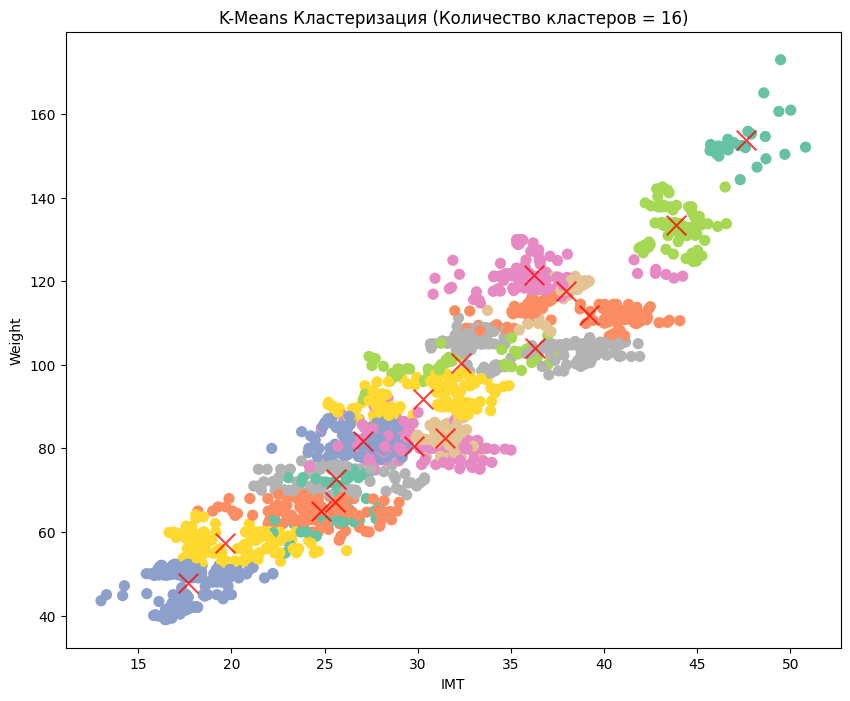

K-Means Количество кластеров: 17
K-Means Silhouette Score: 0.33
K-Means Davies-Bouldin Score: 1.01
K-Means Inertia: 54978.39
K-Means Calinski-Harabasz Score: 3373.28


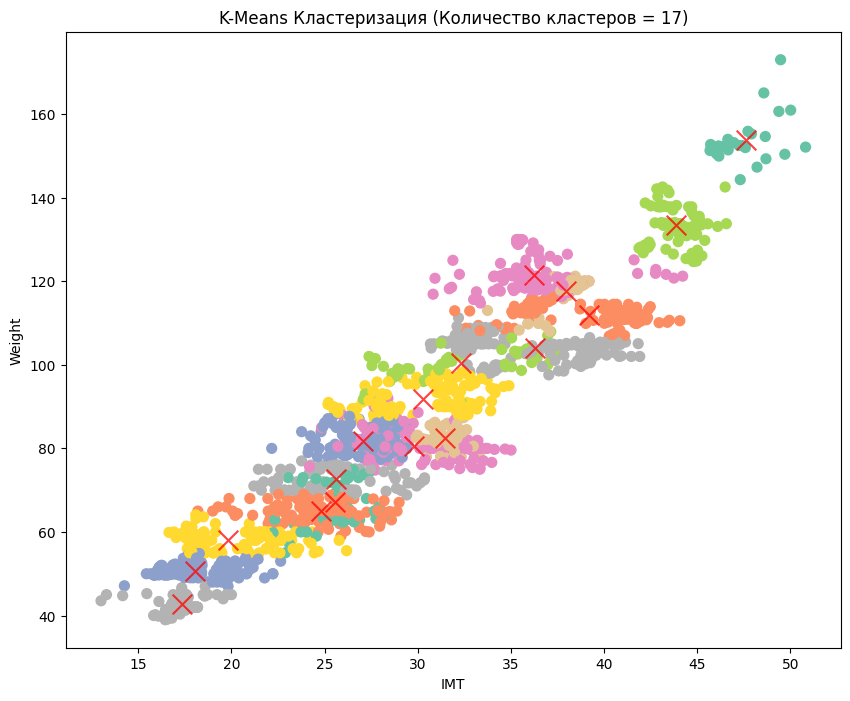

K-Means Количество кластеров: 18
K-Means Silhouette Score: 0.33
K-Means Davies-Bouldin Score: 0.99
K-Means Inertia: 53302.27
K-Means Calinski-Harabasz Score: 3276.65


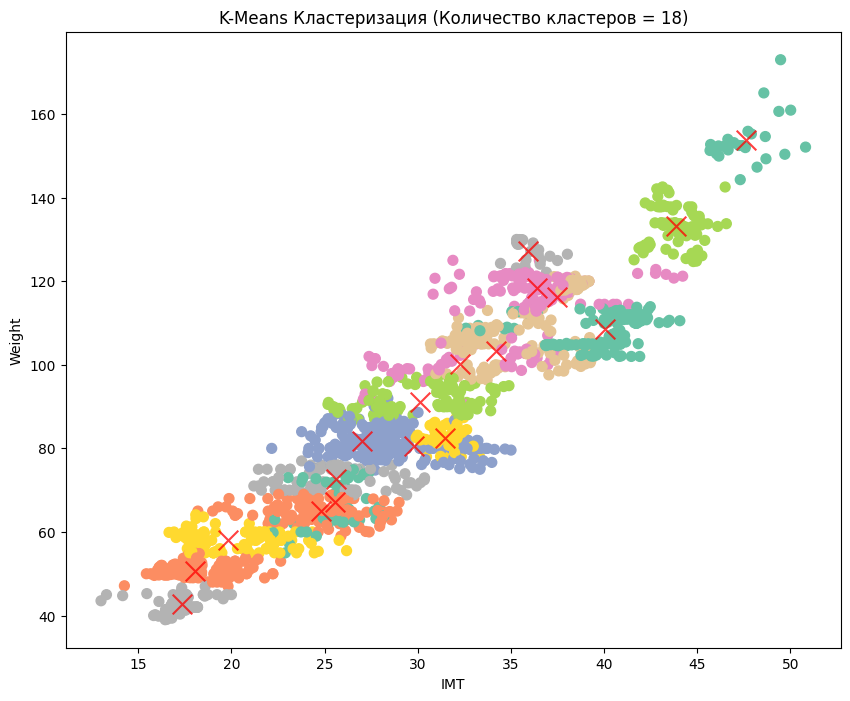

K-Means Количество кластеров: 19
K-Means Silhouette Score: 0.34
K-Means Davies-Bouldin Score: 0.99
K-Means Inertia: 49893.75
K-Means Calinski-Harabasz Score: 3311.80


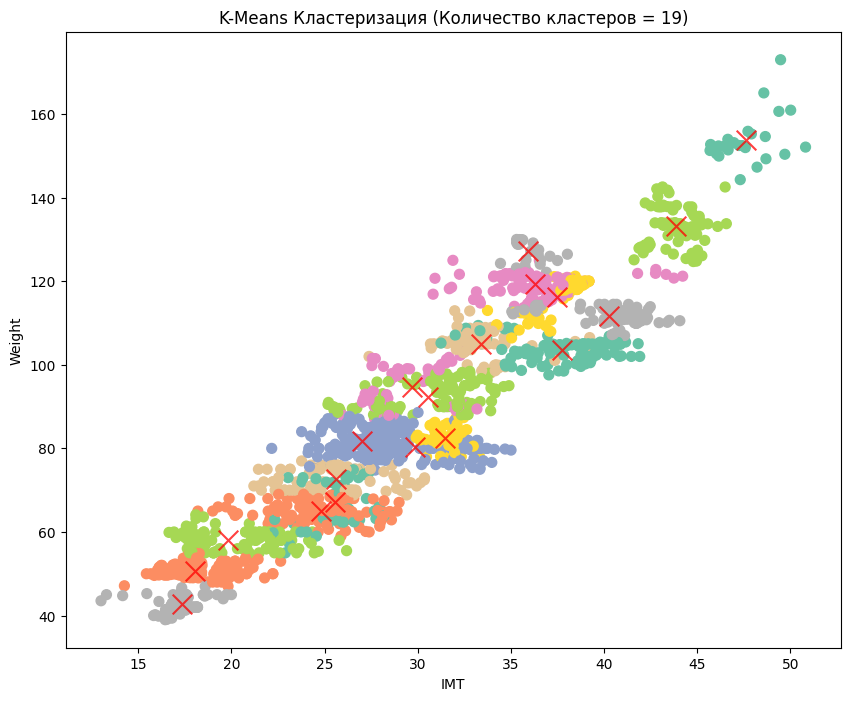

K-Means Количество кластеров: 20
K-Means Silhouette Score: 0.34
K-Means Davies-Bouldin Score: 1.01
K-Means Inertia: 47281.34
K-Means Calinski-Harabasz Score: 3314.86


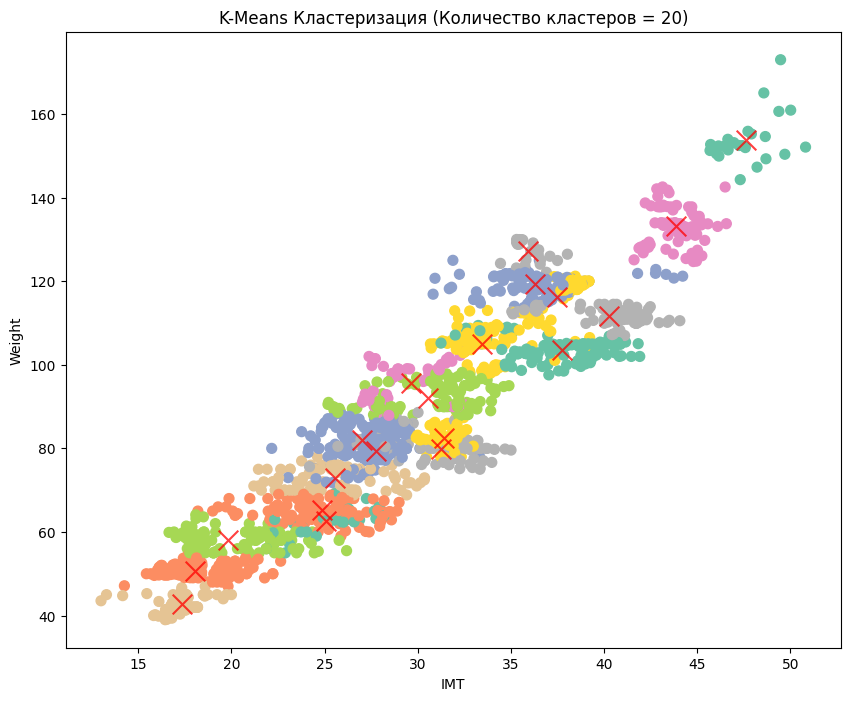

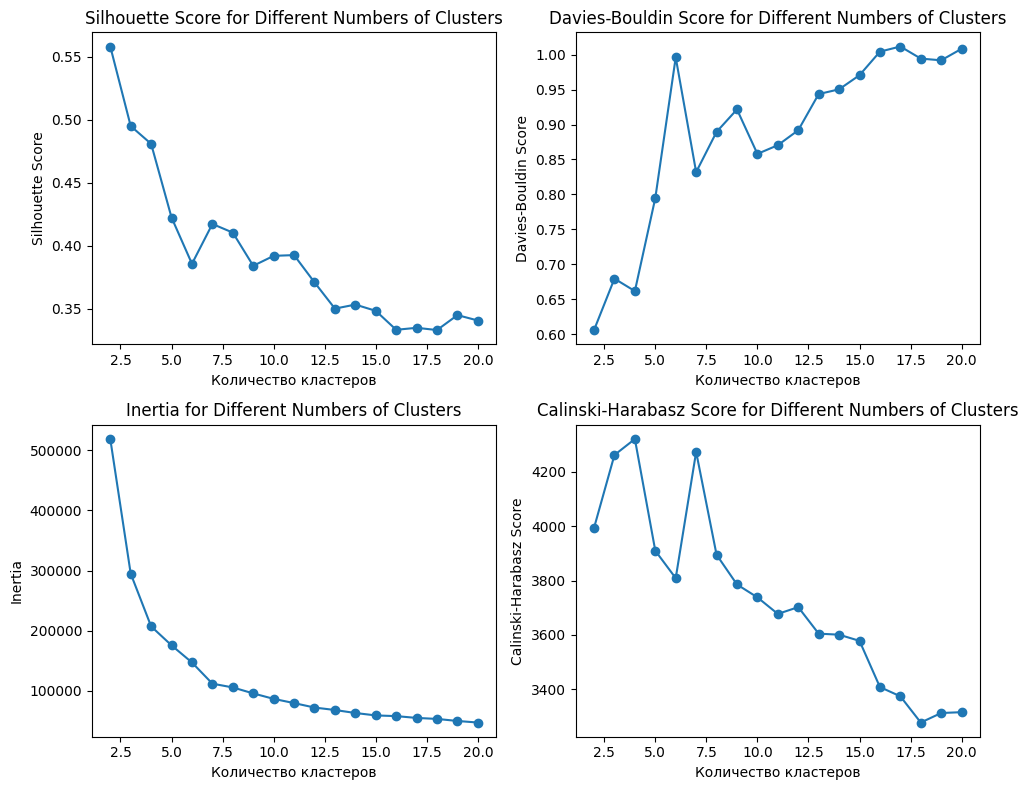

In [84]:
silhouette_scores = [] 
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    kmeans_davies = davies_bouldin_score(data, kmeans_labels)
    kmeans_inertia = kmeans.inertia_
    kmeans_calinski = calinski_harabasz_score(data, kmeans_labels)

    silhouette_scores.append(kmeans_silhouette)
    davies_bouldin_scores.append(kmeans_davies)
    inertia_scores.append(kmeans_inertia)
    calinski_harabasz_scores.append(kmeans_calinski)

    print(f'K-Means Количество кластеров: {n_clusters}')
    print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')
    print(f'K-Means Davies-Bouldin Score: {kmeans_davies:.2f}')
    print(f'K-Means Inertia: {kmeans_inertia:.2f}')
    print(f'K-Means Calinski-Harabasz Score: {kmeans_calinski:.2f}')

    plt.figure(figsize=(10,8))
    plt.scatter(data.iloc[:, -1], data.iloc[:, 3], c=kmeans_labels, s = 50, cmap='Set2')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, -1], centers[:, 3], c='red', s=200, alpha=0.75, marker='x')
    plt.title(f'K-Means Кластеризация (Количество кластеров = {n_clusters})')
    plt.xlabel('IMT')
    plt.ylabel('Weight')
    plt.savefig(f'out_jpg/clustering/kmeans/n_clusters_{n_clusters}.png')
    plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(range(2,21), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')

plt.subplot(2,2,2)
plt.plot(range(2,21), davies_bouldin_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for Different Numbers of Clusters')

plt.subplot(2,2,3)
plt.plot(range(2,21), inertia_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Inertia for Different Numbers of Clusters')

plt.subplot(2, 2, 4)
plt.plot(range(2, 21), calinski_harabasz_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Numbers of Clusters')

plt.tight_layout()
plt.savefig('out_jpg/clustering/kmeans/metrics_for_kmeans.png')
plt.show()

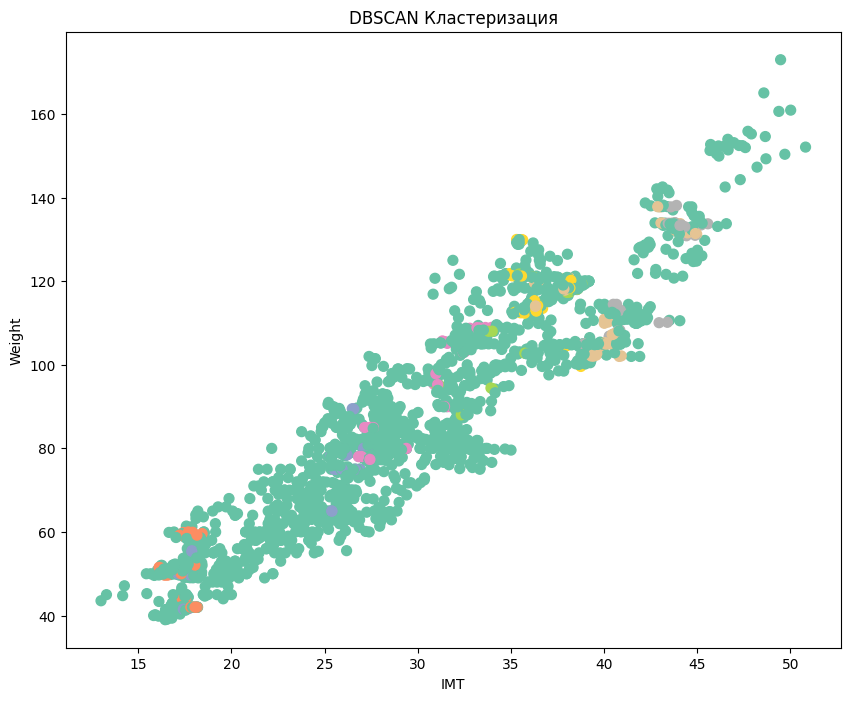

DBSCAN Silhouette Score: -0.55
DBSCAN Davies-Bouldin Score: 1.25
DBSCAN Calinski-Harabasz Score: 5.50


In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(data)

plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:, -1], data.iloc[:, 3], c=dbscan_labels, s=50, cmap='Set2')
plt.xlabel('IMT')
plt.ylabel('Weight')
plt.title('DBSCAN Кластеризация')
plt.savefig('out_jpg/clustering/dbscan/dbscan_info.png')
plt.show()

dbscan_silhouette = silhouette_score(data, dbscan_labels)
dbscan_davies = davies_bouldin_score(data, dbscan_labels)
dbscan_calinski = calinski_harabasz_score(data, dbscan_labels)

print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'DBSCAN Davies-Bouldin Score: {dbscan_davies:.2f}')
print(f'DBSCAN Calinski-Harabasz Score: {dbscan_calinski:.2f}')

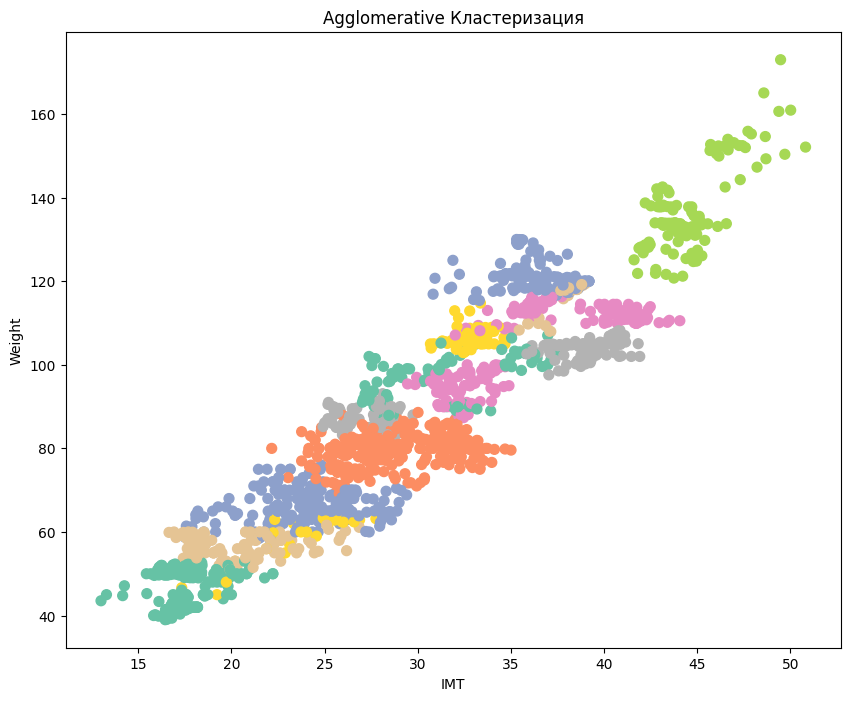

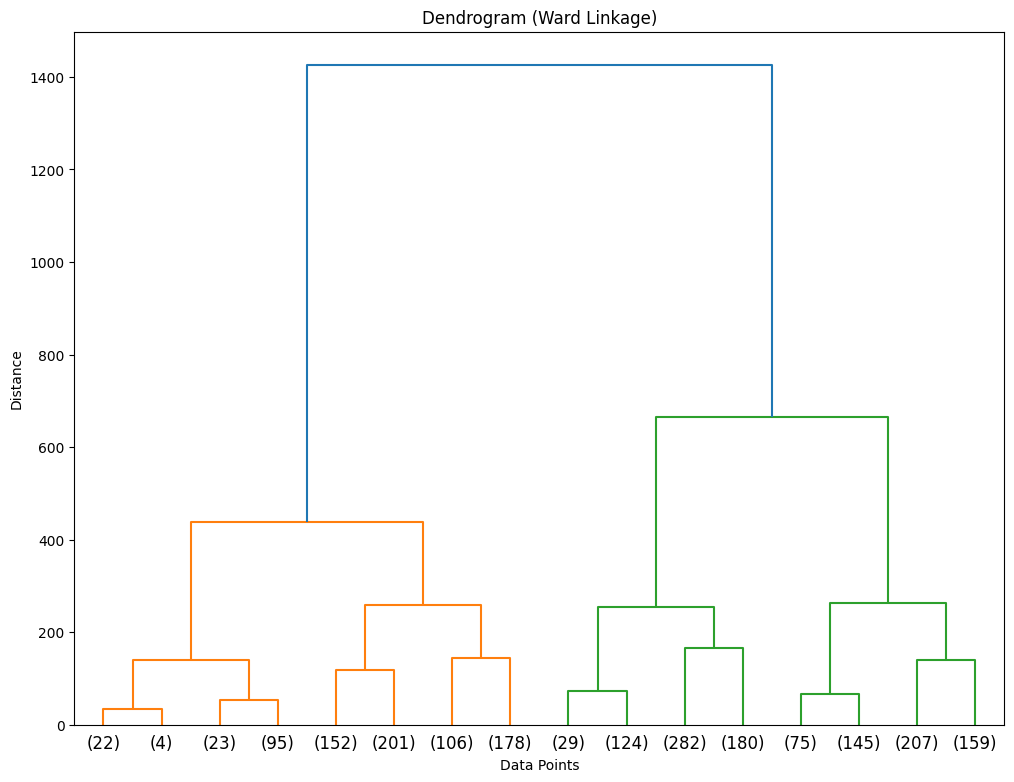

Agglomerate Clustering - Silhouette Score: 0.35
Agglomerate Clustering - Davies-Bouldin Score: 0.90
Agglomerate Clustering - Calinski-Harabasz Score: 3219.77


In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

n_clusters = 16
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
predicted_labels = agg_clustering.fit_predict(data)

plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:, -1], data.iloc[:, 3], c=predicted_labels, s=50, cmap='Set2')
plt.title('Agglomerative Кластеризация')
plt.xlabel('IMT')
plt.ylabel('Weight')
plt.savefig('out_jpg/clustering/agg/agg_info.png')
plt.show()

plt.figure(figsize=(12,9))
Z = linkage(data, method='ward')
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig('out_jpg/clustering/agg/dendrogram.png')
plt.show()

agg_silhouette = silhouette_score(data, predicted_labels)
agg_davies = davies_bouldin_score(data, predicted_labels)
agg_calinski = calinski_harabasz_score(data, predicted_labels)

print(f'Agglomerate Clustering - Silhouette Score: {agg_silhouette:.2f}')
print(f'Agglomerate Clustering - Davies-Bouldin Score: {agg_davies:.2f}')
print(f'Agglomerate Clustering - Calinski-Harabasz Score: {agg_calinski:.2f}')

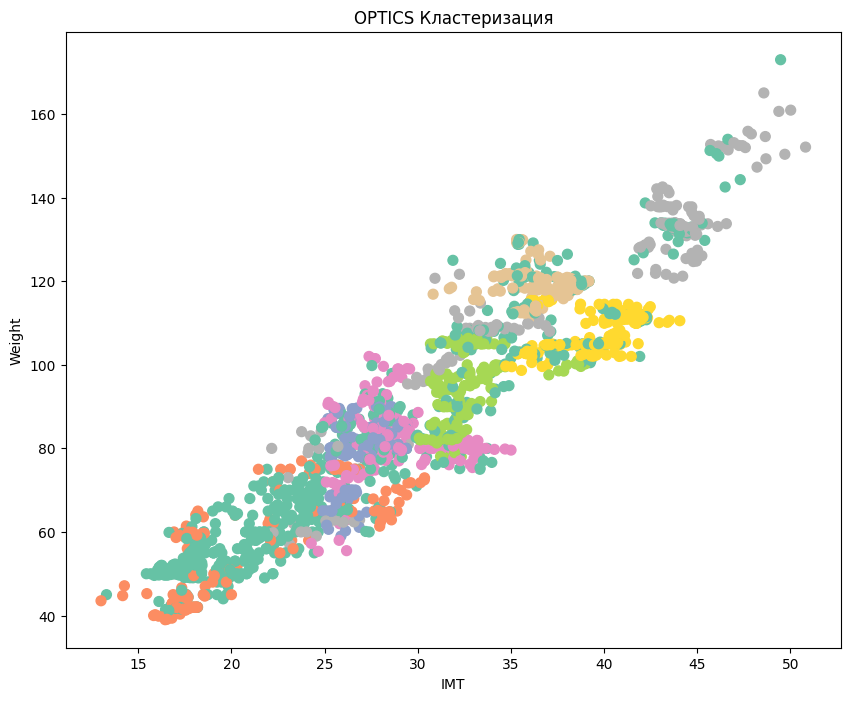

OPTICS Silhouette Score: 0.05
OPTICS Davies-Bouldin Score: 1.66
OPTICS Calinski-Harabasz Score: 8.39


In [90]:
optics = OPTICS(min_samples=2)
optics_labels = optics.fit_predict(data)

plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:, -1], data.iloc[:, 3], c=optics_labels, s=50, cmap='Set2')
plt.xlabel('IMT')
plt.ylabel('Weight')
plt.title('OPTICS Кластеризация')
plt.savefig('out_jpg/clustering/optics/optics_info.png')
plt.show()

optics_silhouette = silhouette_score(data, optics_labels)
optics_davies = davies_bouldin_score(data, optics_labels)
optics_calinski = calinski_harabasz_score(data, optics_labels)

print(f'OPTICS Silhouette Score: {optics_silhouette:.2f}')
print(f'OPTICS Davies-Bouldin Score: {optics_davies:.2f}')
print(f'OPTICS Calinski-Harabasz Score: {optics_calinski:.2f}')

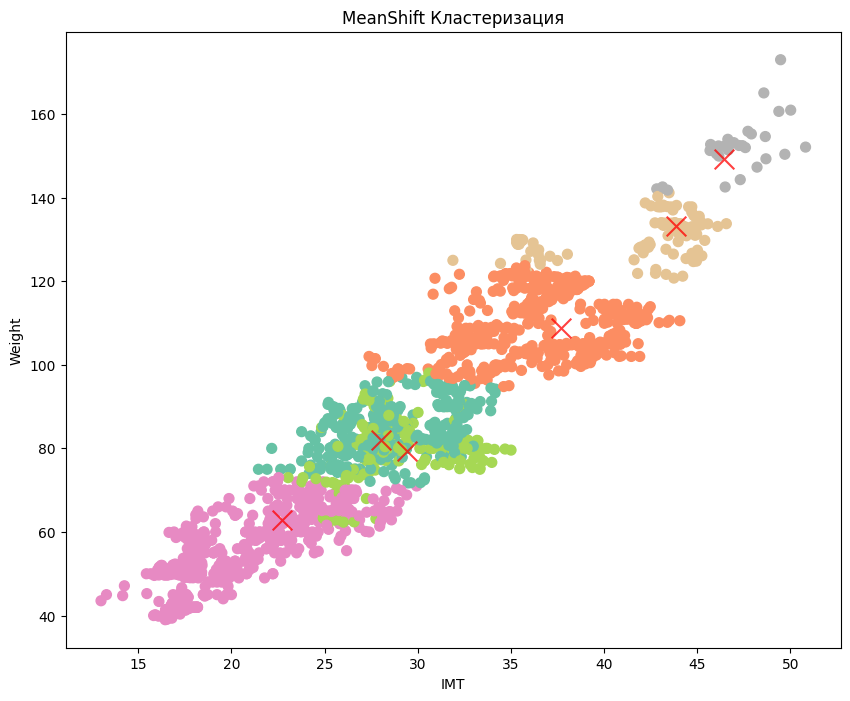

MeanShift Silhouette Score: 0.44
MeanShift Davies-Bouldin Score: 0.74
MeanShift Calinski-Harabasz Score: 3320.86


In [91]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.1)

meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(data)
meanshift_centers = meanshift.cluster_centers_

plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:, -1], data.iloc[:, 3], c=meanshift_labels, s=50, cmap='Set2')
plt.scatter(meanshift_centers[:, -1], meanshift_centers[:, 3], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('IMT')
plt.ylabel('Weight')
plt.title('MeanShift Кластеризация')
plt.savefig('out_jpg/clustering/meanshift/meanshift_info.png')
plt.show()

meanshift_silhouette = silhouette_score(data, meanshift_labels)
meanshift_davies = davies_bouldin_score(data, meanshift_labels)
meanshift_calinski = calinski_harabasz_score(data, meanshift_labels)

print(f'MeanShift Silhouette Score: {meanshift_silhouette:.2f}')
print(f'MeanShift Davies-Bouldin Score: {meanshift_davies:.2f}')
print(f'MeanShift Calinski-Harabasz Score: {meanshift_calinski:.2f}')

In [92]:
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    StackingClassifier,
    BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Определение базовых классификаторов
base_classifiers = [
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42)),
    ('extra_trees', ExtraTreesClassifier(random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('Dummy Classifier', DummyClassifier(strategy='stratified')),
    ('Bagging', BaggingClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('k_neighbors', KNeighborsClassifier())
]

# Определение мета-классификатора
meta_classifier = LogisticRegression(random_state=42, max_iter=1000)

log.add_log_info('Определение базовых классификаторов и Определение мета-классификатора')

In [93]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

log.add_log_info('Разделение данных на обучающую и тестовую выборки с сохранением пропорций классов')

In [94]:
from sklearn.model_selection import StratifiedKFold

# Создание StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=False
)

log.add_log_info('Создание StackingClassifier')

In [95]:
# Обучение StackingClassifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x328b88c20>),
                               ('extra_trees',
                                ExtraTreesClassifier(random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              col...
                                DecisionTreeClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('Dummy Classifier',
                                DummyClassifier(strategy='stratified')),
                               ('Bagging', BaggingClassifier(random_state=42)),
                               ('Naive Bayes', GaussianNB()),
                               ('k_neighbors', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

In [96]:
# Прогнозирование на тестовых данных
y_pred = stacking_clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

log.add_log_info(f'\nStacking Classifier Accuracy: {accuracy:.4f}')
log.add_log_info('Classification Report:')
log.add_log_info(report)

print(f'\nStacking Classifier Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Stacking Classifier Accuracy: 0.9908
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      0.99      0.99        81
           2       0.99      1.00      1.00       117
           3       0.99      0.99      0.99       102
           4       0.99      0.99      0.99       108
           5       0.97      0.99      0.98        73
           6       0.99      0.97      0.98        79

    accuracy                           0.99       655
   macro avg       0.99      0.99      0.99       655
weighted avg       0.99      0.99      0.99       655



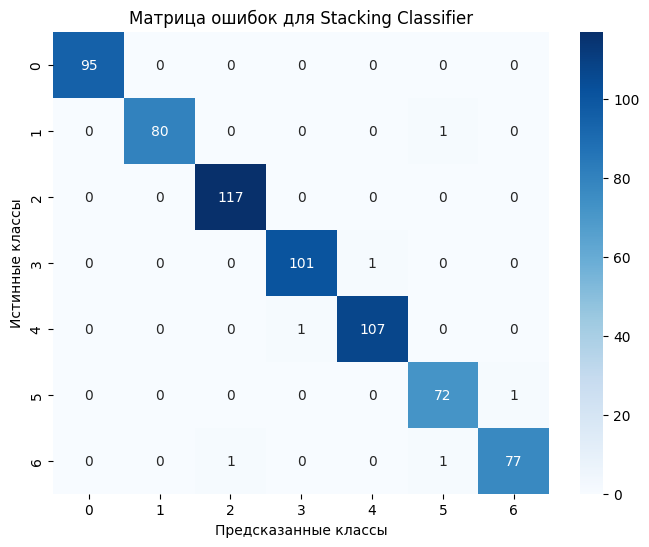

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок для Stacking Classifier')
plt.savefig(f'out_jpg/conf_matrix.jpg', bbox_inches='tight')
plt.show()

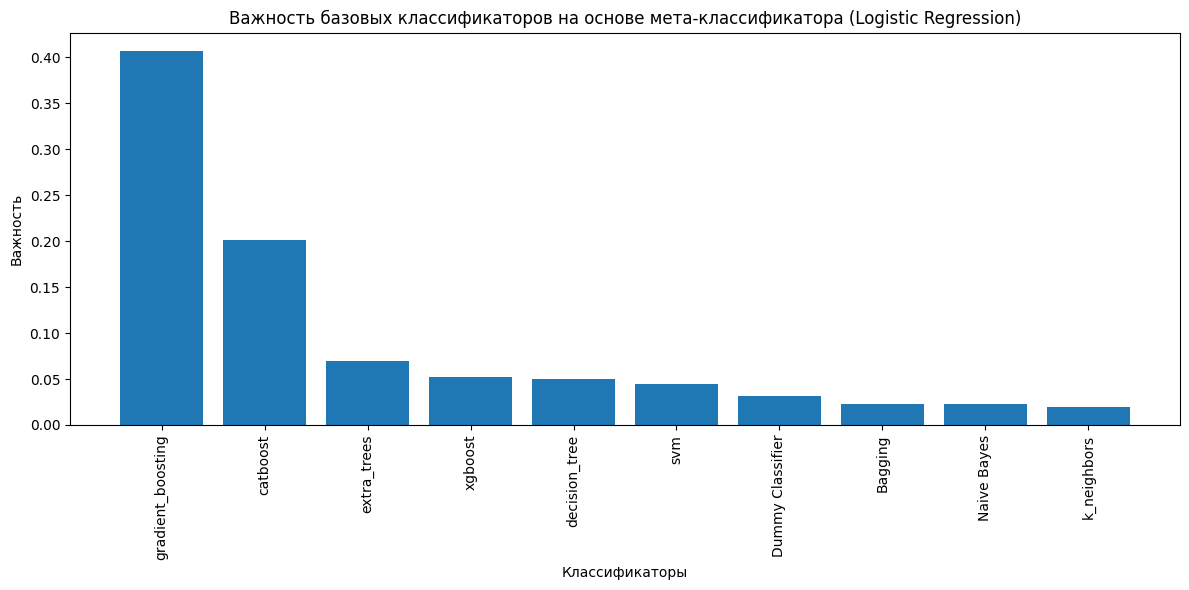

In [99]:
# Важность признаков на основе мета-классификатора (Logistic Regression)
if isinstance(stacking_clf.final_estimator_, LogisticRegression):

    if len(feature_importance.nlargest(10)) == len(base_classifiers):
        # Сортировка признаков по важности
        indices = np.argsort(feature_importance.nlargest(10))[::-1]

        # Получение имен базовых классификаторов
        clf_names = [name for name, _ in base_classifiers]

        # Визуализация важности классификаторов
        plt.figure(figsize=(12,6))
        plt.title("Важность базовых классификаторов на основе мета-классификатора (Logistic Regression)")
        plt.bar(range(len(feature_importance.nlargest(10))), feature_importance.nlargest(10)[indices], align='center')
        plt.xticks(range(len(feature_importance.nlargest(10))), np.array(clf_names)[indices], rotation=90)
        plt.xlabel('Классификаторы')
        plt.ylabel('Важность')
        plt.tight_layout()
        plt.savefig(f'out_jpg/Feature_importances_with_logreg.jpg', bbox_inches='tight')
        plt.show()
    else:
        print("Невозможно сопоставить важности признаков с базовыми классификаторами из-за несоответствия размеров.")